In [24]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import pandas as pd
import numpy as np

path = 'archive/dataset.csv'
df = pd.read_csv(path)

X = df.drop('Target', axis=1).values  # 特徵
y = df['Target'].values               # 標籤

le = LabelEncoder()
y = le.fit_transform(y)
print(y)  # (4209, 57) (4209, 56) (4209,)

[0 2 0 ... 0 2 2]


In [ ]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [22]:

df = pd.read_csv(path)

binary_cols =['Daytime/evening attendance','Displaced','Educational special needs','Debtor'
              ,'Tuition fees up to date','Gender','Scholarship holder','International']
# df = pd.get_dummies(df, columns=binary_cols, drop_first=True)
# pd.set_option('display.max_columns', None)
df[binary_cols] = df[binary_cols]
df = pd.get_dummies(df, columns=binary_cols, drop_first=False)
df.to_csv('archive/dataset_binary_encoded.csv', index=False)
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Previous qualification  Nacionality  Mother's qualification  \
0                       1            1                      13   
1                       1            1                       1   
2                       1            1                      22   
3                       1            1                      23   
4                       1            1                      22   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      10                    6                   10   
1                       3                    4                    4   
2                      27                   10                   10   
3                      27                    6                    4   
4                      28                   10                   10   

   Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12

In [17]:
path = 'archive/dataset.csv'
df = pd.read_csv(path)
path = 'train_set.csv'
train_df = pd.read_csv(path)
path = 'test_set.csv'
test_df = pd.read_csv(path)
print(df.shape, train_df.shape, test_df.shape)  # (3367, 57) (3367, 57) (842, 57)

(4424, 35) (3539, 35) (885, 35)


In [31]:
#計算Target的類別數量的比例算出百分比
unique, counts = np.unique(y_test, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in y_test:", class_distribution)

# 計算每個類別的比例
total = sum(counts)
class_percentage = {k: v / total * 100 for k, v in class_distribution.items()}
print("Class percentage in y_test:", class_percentage)

Class distribution in y_test: {'Dropout': np.int64(284), 'Enrolled': np.int64(159), 'Graduate': np.int64(442)}
Class percentage in y_test: {'Dropout': np.float64(32.090395480225986), 'Enrolled': np.float64(17.966101694915253), 'Graduate': np.float64(49.94350282485876)}


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
df = pd.read_csv('archive/dataset.csv')

print("資料筆數與欄位數：", df.shape)
print("\n欄位資訊：")
print(df.info())
print("\n缺失值統計：")
print(df.isnull().sum())

資料筆數與欄位數： (4424, 35)

欄位資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occu

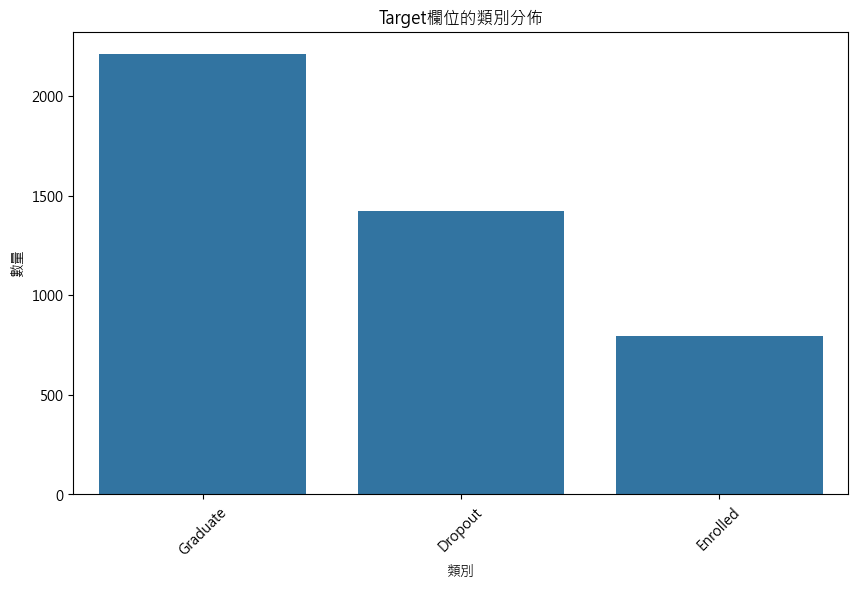

In [30]:
#做Target欄位的長條圖
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Target', order=df['Target'].value_counts().index)
plt.title('Target欄位的類別分佈')
plt.xlabel('類別')
plt.ylabel('數量')
plt.xticks(rotation=45)
plt.show()

In [33]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\n數值欄位描述統計：")
print(df[num_cols].describe().T)


數值欄位描述統計：
                                                 count       mean        std  \
Marital status                                  4424.0   1.178571   0.605747   
Application mode                                4424.0   6.886980   5.298964   
Application order                               4424.0   1.727848   1.313793   
Course                                          4424.0   9.899186   4.331792   
Daytime/evening attendance                      4424.0   0.890823   0.311897   
Previous qualification                          4424.0   2.531420   3.963707   
Nacionality                                     4424.0   1.254521   1.748447   
Mother's qualification                          4424.0  12.322107   9.026251   
Father's qualification                          4424.0  16.455244  11.044800   
Mother's occupation                             4424.0   7.317812   3.997828   
Father's occupation                             4424.0   7.819168   4.856692   
Displaced                    

In [75]:
df = pd.read_csv('archive/dataset.csv')

binary_cols =['Gender','Daytime_evening_attendance','Displaced','Educational special needs','Debtor'
              ,'Tuition fees up to date','Scholarship holder','International']

categorical_cols = ['Marital status','Application mode','Course'
                    ,'Previous qualification','Nacionality','Mother qualification'
                    ,'Father qualification','Mother occupation'
                    ,'Father occupation']

numeric_cols =['Application order','Age at enrollment','Curricular units 1st sem (credited)'
               ,'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)',
               'Curricular units 1st sem (without evaluations)',
               'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
               'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
               'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
               'Unemployment rate','Inflation rate','GDP']


#查看欄位有沒有重複
all_cols = binary_cols + categorical_cols + numeric_cols
print("欄位總數：", len(all_cols))
print("欄位不重複數量：", len(set(all_cols)))
#輸出各類型的雷位數量
print(f"Binary columns: {len(binary_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Numeric columns: {len(numeric_cols)}")
#判斷上面的欄位有沒有出現在df裡面
for col in all_cols:
    if col not in df.columns:
        print(f"欄位 {col} 不在資料集中")

欄位總數： 34
欄位不重複數量： 34
Binary columns: 8
Categorical columns: 9
Numeric columns: 17


In [60]:
import os
#把binary_cols裡的欄位做成圖，並存在data_analyze資料夾裡
base = 'data_analyze'
if not os.path.exists(base):
    os.makedirs(base)
import matplotlib.pyplot as plt

for col in binary_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col}的類別分佈")
    plt.savefig(os.path.join(base, f"count_{col}.png"))
    plt.close()


In [64]:
#把分類的欄位做成圖，並存在data_analyze資料夾裡
for col in categorical_cols:
    plt.figure()
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f"{col}的類別分佈")
    plt.savefig(os.path.join(base, f"count_{col}.png"))
    plt.close()

In [76]:
#把數值欄位做成直方圖，並存在data_analyze資料夾裡
df = pd.read_csv('archive/dataset.csv')

for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"{col}的分佈")
    plt.savefig(os.path.join(base, f"hist_{col}.png"))
    plt.close()

C:\Users\H514 #4856\AppData\Local\Temp\ipykernel_6452\1870404825.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  plt.savefig(os.path.join(base, f"hist_{col}.png"))
C:\Users\H514 #4856\AppData\Local\Temp\ipykernel_6452\1870404825.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  plt.savefig(os.path.join(base, f"hist_{col}.png"))


Target                     Dropout   Enrolled   Graduate
Tuition fees up to date                                 
0                        86.553030   7.954545   5.492424
1                        24.743326  19.301848  55.954825


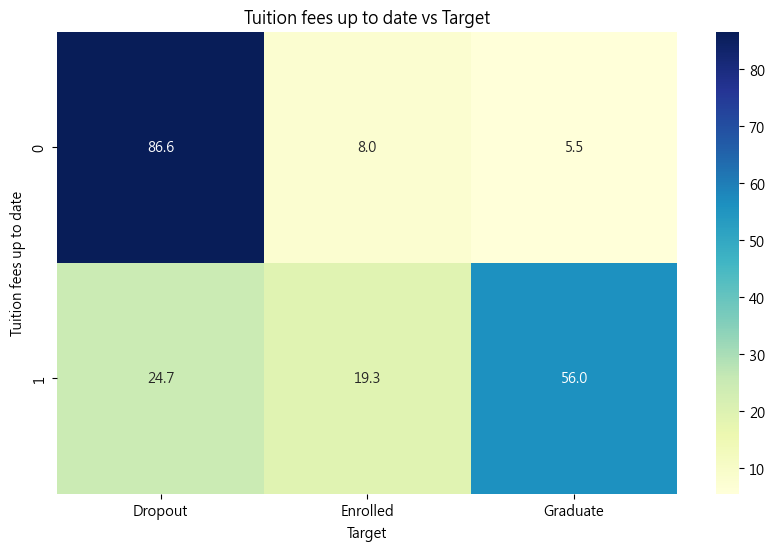

In [82]:
#針對Tuition fees up to date跟Target做交叉表分析，並算出比例*100%，並畫成圖，存在data_analyze資料夾裡

cross_tab = pd.crosstab(df['Tuition fees up to date'], df['Target'])
cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
print(cross_tab)

# 畫圖
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Tuition fees up to date vs Target")
plt.xlabel("Target")
plt.ylabel("Tuition fees up to date")
plt.savefig(os.path.join(base, "tuition_fees_vs_target.png"))
plt.show()

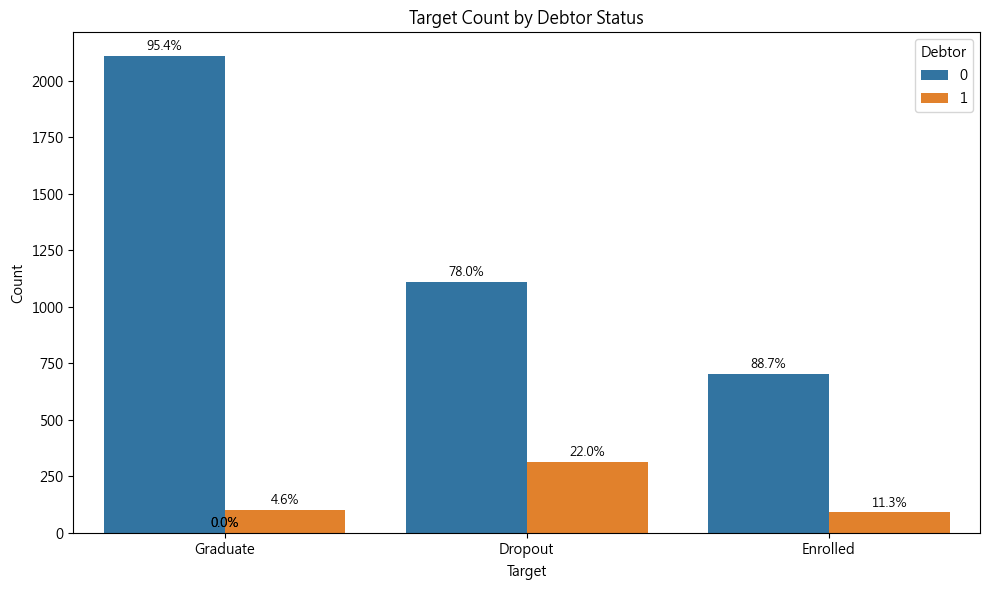

In [96]:
#根據debtor欄位畫出Target的長條圖，並把百分比寫出來
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Target', hue='Debtor',
                   order=df['Target'].value_counts().index)
plt.title("Target Count by Debtor Status")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(title="Debtor", loc="upper right")

# 每個 Target 的總數（用字串對應方便比對 xtick labels）
total = df['Target'].value_counts()
total_str = {str(k): int(v) for k, v in total.items()}

xticks = np.array(ax.get_xticks())
xtick_labels = [tl.get_text() for tl in ax.get_xticklabels()]

for p in ax.patches:
    x_center = p.get_x() + p.get_width() / 2.0
    idx = int(np.argmin(np.abs(xticks - x_center)))
    target_label = xtick_labels[idx]
    denom = total_str.get(target_label, 1)
    pct = (p.get_height() / denom) if denom > 0 else 0
    ax.annotate(f"{pct:.1%}", (x_center, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 2), textcoords='offset points')
plt.savefig(os.path.join(base, "Target Count by Debtor Status.png"))
plt.tight_layout()
plt.show()


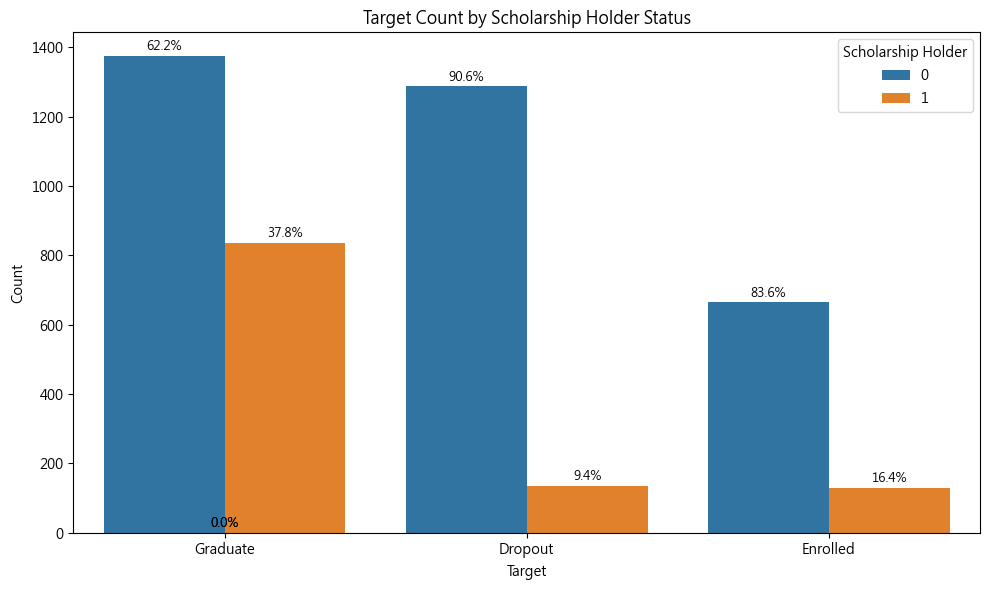

In [98]:
#根據Scholarship holder欄位畫出Target的長條圖，並把百分比寫出來
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Target', hue='Scholarship holder',
                   order=df['Target'].value_counts().index)
plt.title("Target Count by Scholarship Holder Status")
plt.xlabel("Target")
plt.ylabel("Count")
plt.legend(title="Scholarship Holder", loc="upper right")

# 每個 Target 的總數（用字串對應方便比對 xtick labels）
total = df['Target'].value_counts()
total_str = {str(k): int(v) for k, v in total.items()}

xticks = np.array(ax.get_xticks())
xtick_labels = [tl.get_text() for tl in ax.get_xticklabels()]

for p in ax.patches:
    x_center = p.get_x() + p.get_width() / 2.0
    idx = int(np.argmin(np.abs(xticks - x_center)))
    target_label = xtick_labels[idx]
    denom = total_str.get(target_label, 1)
    pct = (p.get_height() / denom) if denom > 0 else 0
    ax.annotate(f"{pct:.1%}", (x_center, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 2), textcoords='offset points')
plt.savefig(os.path.join(base, "Target Count by Scholarship Holder Status.png"))
plt.tight_layout()
plt.show()


c:\Users\H514 #4856\Desktop\deep learning 114206103\dlvenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.draw()
C:\Users\H514 #4856\AppData\Local\Temp\ipykernel_6452\2571021995.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  plt.savefig(os.path.join(base, "Pearson Correlation Coefficient on numeric_cols.png"))
c:\Users\H514 #4856\Desktop\deep learning 114206103\dlvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


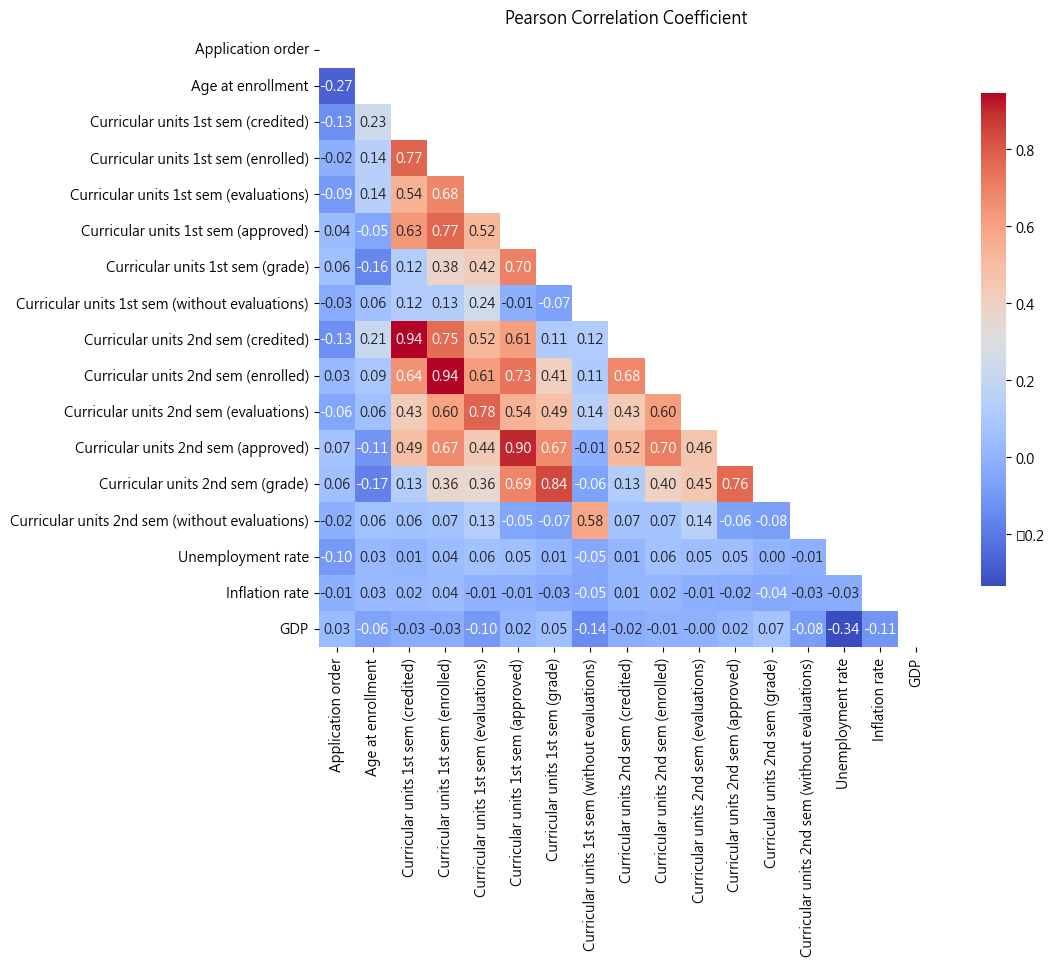

In [91]:
#把數值型的資料去做皮爾斯相關係數分析，並畫圖，只留上三角形，並儲存到data_analyze資料夾裡

corr = df[numeric_cols].corr(method='pearson')
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8}, mask=mask)
plt.title("Pearson Correlation Coefficient")
plt.savefig(os.path.join(base, "Pearson Correlation Coefficient on numeric_cols.png"))
plt.show()

c:\Users\H514 #4856\Desktop\deep learning 114206103\dlvenv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.draw()
C:\Users\H514 #4856\AppData\Local\Temp\ipykernel_6452\4035874277.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  plt.savefig(os.path.join(base, "Spearman Correlation Coefficient on numeric_cols.png"))
c:\Users\H514 #4856\Desktop\deep learning 114206103\dlvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


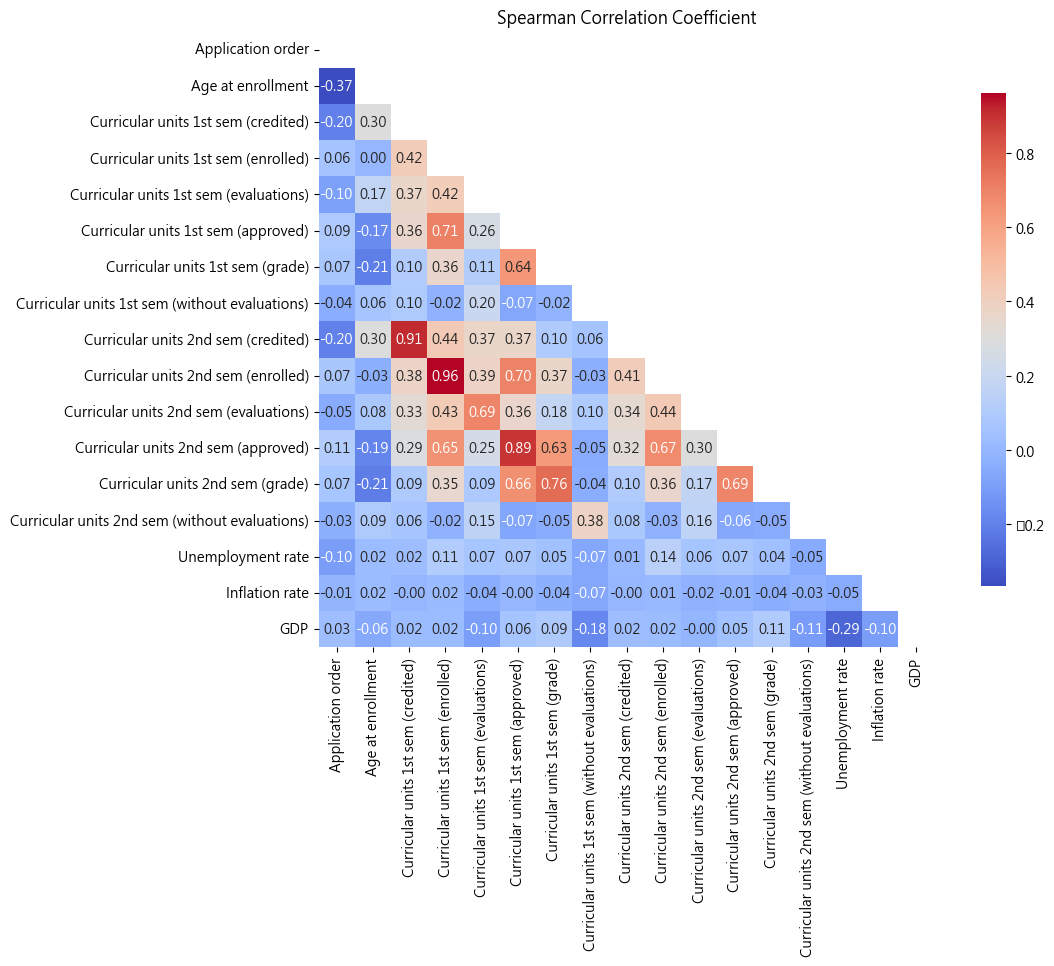

In [92]:
#把數值型的資料去做斯皮爾曼相關係數分析，並畫圖，只留上三角形，並儲存到data_analyze資料夾裡
corr = df[numeric_cols].corr(method='spearman')
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8}, mask=mask)
plt.title("Spearman Correlation Coefficient")
plt.savefig(os.path.join(base, "Spearman Correlation Coefficient on numeric_cols.png"))
plt.show()

In [102]:
from sklearn.preprocessing import MinMaxScaler
path = r'C:\Users\H514 #4856\Desktop\deep learning 114206103\HW1\archive/dataset.csv'

binary_cols =['Gender','Daytime_evening_attendance','Displaced','Educational special needs','Debtor'
              ,'Tuition fees up to date','Scholarship holder','International']

categorical_cols = ['Marital status','Application mode','Course'
                    ,'Previous qualification','Nacionality','Mother qualification'
                    ,'Father qualification','Mother occupation'
                    ,'Father occupation']

numeric_cols =['Application order','Age at enrollment','Curricular units 1st sem (credited)'
               ,'Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)','Curricular units 1st sem (grade)',
               'Curricular units 1st sem (without evaluations)',
               'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
               'Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)',
               'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',
               'Unemployment rate','Inflation rate','GDP']

df = pd.read_csv(path)
print(f"Original DataFrame shape: {df.shape}")

# (1) 對 0/1 類別型做 One-Hot
df[binary_cols] = df[binary_cols].astype(str)
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)

#對一般類別型欄位做 One-Hot
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# (3) 對數值型欄位做 Min-Max 正規化
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(f"Transformed DataFrame shape: {df.shape}")
df.head()

Original DataFrame shape: (4424, 35)
Transformed DataFrame shape: (4424, 237)


Application order  Age at enrollment  Curricular units 1st sem (credited)  \
0           0.555556           0.056604                                  0.0   
1           0.111111           0.037736                                  0.0   
2           0.555556           0.037736                                  0.0   
3           0.222222           0.056604                                  0.0   
4           0.111111           0.528302                                  0.0   

   Curricular units 1st sem (enrolled)  \
0                             0.000000   
1                             0.230769   
2                             0.230769   
3                             0.230769   
4                             0.230769   

   Curricular units 1st sem (evaluations)  \
0                                0.000000   
1                                0.133333   
2                                0.000000   
3                                0.177778   
4                                0.200000   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                             0.000000                          0.000000   
1                             0.230769                          0.741722   
2                             0.000000                          0.000000   
3                             0.230769                          0.711447   
4                             0.192308                          0.653422   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                              0.00000   
1                                  0.0                              0.26087   
2                                  0.0                              0.26087   
3                                  0.0                              0.26087   
4                                  0.0                              0.26087   

   Curricular units 2nd sem (evaluations)  \
0                                0.000000   
1                                0.181818   
2                                0.000000   
3                                0.303030   
4                                0.181818   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                 0.00                          0.000000   
1                                 0.30                          0.735897   
2                                 0.00                          0.000000   
3                                 0.25                          0.667692   
4                                 0.30                          0.700000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           0.732558   
2                                             0.0           0.372093   
3                                             0.0           0.209302   
4                                             0.0           0.732558   

   Inflation rate       GDP    Target  Gender_1  Daytime_evening_attendance_1  \
0        0.488889  0.766182   Dropout      True                          True   
1        0.111111  0.640687  Graduate      True                          True   
2        0.488889  0.766182   Dropout      True                          True   
3        0.000000  0.124174  Graduate     False                          True   
4        0.111111  0.640687  Graduate     False                         False   

   Displaced_1  Educational special needs_1  Debtor_1  \
0         True                        Fals

In [104]:
df = pd.read_csv('archive/dataset.csv')

y= df['Target'].values               # 標籤
print(y)  # (4209, 57) (4209, 56) (4209,)
le = LabelEncoder()
y = le.fit_transform(y)
print(y)  # (4209, 57) (4209, 56) (4209,)

['Dropout' 'Graduate' 'Dropout' ... 'Dropout' 'Graduate' 'Graduate']
[0 2 0 ... 0 2 2]


In [112]:
from torchsummary import summary
from Modle import MLP
model = MLP(intput_dim=236, num_classes=3)
print(model)

MLP(
  (fc1): Linear(in_features=236, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
)


In [117]:
task = 'different_optim'
base = os.path.join(r'C:\Users\H514 #4856\Desktop\deep learning 114206103\HW1', task)
print(base)
best_fold = 2
path = os.path.join(base,f"loss_curve_best_fold_{best_fold}.png")
print(path)

C:\Users\H514 #4856\Desktop\deep learning 114206103\HW1\different_optim
C:\Users\H514 #4856\Desktop\deep learning 114206103\HW1\different_optim\loss_curve_best_fold_2.png
